In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline
import pyreadr

from utils import helpers

from importlib import reload

In [81]:
team_coords = {
    'LAA': 'M125 226.5c-13.8 0-17.8-7.4-24.6-15.6-8.3-10.1-35.3-53.3-39.2-58.3-4.4-5.6-8.8-11.2-13.3-16.7-3.8-4.8-7.6-9.5-11.3-14.2-1.9-2.4-6-7.5-6-7.6l-2.4-8.1-.9-4.4-.1-3.7.4-3.3.8-2.9 1.2-2.6 1.4-2.4 1.6-2.2 1.8-1.9 1.8-2 1.9-2 1.9-2 1.9-2 1.9-2 1.9-2 1.9-2 2-2.1 2-2.1 2-2.1 2-2.1 2.1-2.2 2.1-2.2 2.3-1.8 2.8-.7 2.7-.7 2.7-.7 2.7-.7 2.7-.7 2.7-.7L81 49l2.7-.7 2.7-.7 2.7-.7 2.7-.7 2.7-.7 2.7-.7 2.8-.8 2.7-.7 2.8-.7 2.8-.7 2.8-.7 2.8-.7 2.8-.7 2.8-.7 2.9-.8 2.9-.8 2.9-.8 2.9-.8h2.9l2.8 1.5 2.8 1.5 2.7 1.5 2.7 1.5 2.7 1.5 2.6 1.4 2.6 1.4 2.6 1.4L158 49l2.5 1.4 2.5 1.4 2.5 1.3 2.4 1.3 2.4 1.3 2.4 1.3 2.4 1.3 2.4 1.3 2.4 1.3 2.3 1.3 2.3 1.3 2.3 1.3 2.3 1.3 2.3 1.3 2.3 1.3L196 70l2.3 1.3 2.3 1.3 2.3 1.3 2.3 1.3 2.3 1.3 2.3 1.3 2.3 1.3L214 81l1.9 1.9 1.9 1.9 1.6 2.2 1.4 2.4L222 92l.8 3 .3 3.4v3.7l-.9 4.4-.4.4-35.3 49.9s-37.4 55.7-43.8 61.1c-4.9 4.2-10.9 8.6-17.7 8.6z',
    'HOU': 'M125.7 222.2c-11.4 0-19.8-9.7-19.8-9.7l-45.4-55.1 1-12.9-31.3-31.3 2.3-2.7L34 109l1.6-1.6 1.6-1.6 1.6-1.6 1.6-1.6L42 101l1.6-1.6 1.7-1.6 1.7-1.6 1.7-1.6 1.7-1.7 1.7-1.7 1.7-1.7 1.7-1.7 1.8-1.7 1.9-1.5 1.9-1.5 1.9-1.5 1.9-1.5 1.9-1.5 1.9-1.6L67 66.5l1.9-2.2 2-2.2 2-2.2 21.4-15.2 2.5-2 2.6-2.1 2.6-2.1 2.7-2.1 2.7-2.2 2.9-1.4h45.1l2.6 2.5 2.4 3.1 2.6 1.8 2.3 2.8 2.2 2.8 2.2 2.7 2.1 2.6 2.1 2.6 2 2.5 2 2.5 2.5.9 2.7.4 1.9 2.4 1.9 2.3 1.8 2.3 1.8 2.3 1.8 2.2 1.8 2.2 1.7 2.2 1.7 2.1 1.7 2.1 1.7 2.1 1.6 2 1.6 2 1.6 2 1.6 2 1.6 2 1.6 1.9 1.6 1.9 1.5 1.9 1.5 1.9 1.5 1.9 1.5 1.9 1.5 1.9 1.5 1.9 1.5 1.6-23.5 23.2s1.8 12.2-6.7 20.6c-5.3 5.2-47.7 59.9-47.7 59.9s-7.6 9.5-19 9.5z', 
    'OAK': 'M141.9 222.2s-9.7 2.1-16.4 2.1-16.4-1.9-16.4-1.9L102 215s-56-19.7-60.2-82.7l-16.1-20.7 2.3-5.5 1-2.4 1.1-2.4 1.1-2.4 1.1-2.5 1.1-2.5 1.1-2.6 1.1-2.6 1.2-2.7 1.2-2.7 1.2-2.8 1.2-2.8 1.3-2.9 2-1.8 2.4-1.1 2.5-1 2.5-1 2.5-1 2.5-1 2.4-1 2.4-1 2.4-1 2.4-1 2.3-1.3 2.2-1.5 2.3-1.5L75 58l2.3-1.6 2.3-1.6 2.4-1.6 2.4-1.6 2.4-1.6 2.4-1.7 2.5-1.7 2.6-1.5 2.6-1.3 2.7-1.3 2.7-1.3 2.7-1.3 2.7-1.3 2.8-1.3 2.9-.3H136.6l2.9.3 2.8 1.4L145 40l2.7 1.3 2.7 1.3 2.7 1.3 2.6 1.3 2.5 1.5 2.5 1.7 2.4 1.7 2.4 1.7 2.4 1.6 2.4 1.6 2.3 1.6L175 58l2.3 1.6 2.3 1.5 2.2 1.5 2.4 1.2 2.4 1 2.4 1 2.4 1 2.5 1 2.5 1 2.5 1 2.5 1 2.5 1 2.4 1.1 2 1.9 1.3 2.9 1.2 2.8 1.2 2.8 1.2 2.7 1.2 2.7 1.1 2.6 1.1 2.6 1.1 2.5 1.1 2.5 1.1 2.4 1.1 2.4 1.1 2.3 2.5 5-15.9 22c-4.1 62.9-61.3 81.9-61.3 81.9l-5.5 7.3z',
    'TOR': 'M28.6,106.5l1.7-1.6l1.6-1.7l1.7-1.7 l1.7-1.7l1.7-1.7l1.7-1.7l1.7-1.7l1.6-1.9l1.6-1.9l1.6-2l1.6-2l1.6-2l1.7-2l1.4-2.4L53,78l1.5-2.5L56,73l1.6-2.6l1.8-2.2l2-1.9 l2-2l2-2l2-2l2.1-2l2.1-2l2.2-2.1l2.2-2.1l2.5-1.2l2.6-1.1l2.6-1l2.6-1l2.6-1.1l2.6-1.1l2.7-1.1l2.7-1.1l2.7-1.1l2.7-1.1l2.7-1.1 l2.8-1l2.8-1l2.8-0.7l2.9-0.4l2.9-0.4l2.9-0.2h2.9h2.9l2.9,0.2l2.9,0.4l2.9,0.4l2.8,0.8l2.8,0.9l2.8,1l2.7,1.2l2.7,1.3l2.7,1.3 l2.6,1.3l2.6,1.2l2.6,1.2l2.6,1.2L166,50l2.5,1.2l2.4,1.6l2.2,2.2l2.1,2.2l2.1,2.2l2,2.1l2,2.1l2,2l2,2l1.9,2l2,1.8l2,1.7l2,1.7 l2,1.7l2,1.5l2.1,1.3l2.2,1.3l2.1,1.3l2.1,1.3l1.5,2.2l1.5,2.2l1.5,2.1l1.5,2.1l1.5,2.1l1.5,2l1.5,2.1l1.4,2l1.4,2l1.4,2l1.4,2 l0.5,0.8c0,0-7.3,7.6-8.9,9.1c-1.6,1.5-3,2.3-4.8,5.2c-1.9,2.9-3,5.7-4.3,8.3c-1.3,2.6-4.8,10.4-6.2,13.7s-3.9,8.3-5.2,10.4 c-1.3,2.1-5.6,9.2-7.5,12.3s-9.2,13.6-11.6,16.5c-2.4,3-8.9,11.2-8.9,11.2s-2.6,3.4-3.5,4.9l-4.3,5.7l0.5,0.9c0,0-7,6.5-8.2,7.5 c-1.1,0.9-4.2,3.3-4.2,3.3l-0.8-0.8c-4.2,2.7-7.2,4.8-10,5.4s-2.3,0.8-4.2,0.8s-9.6,0-11.6,0s-8.9-3.4-10.1-4.1l-1,0.7 c0,0-7.2-5.7-9-7.4s-6.2-5.1-6.2-5.1l0.5-0.8c0,0-2.7-4.1-3.6-5.4s-3.1-4.4-3.1-4.4s-0.7-0.8-2.1-2.3s-7.2-9.4-9.7-12.4 c-2.4-3-3.8-5.4-6.4-9.2s-5.3-8.7-7.3-12.2s-5.3-9.4-7.2-13.1c-1.9-3.7-3.9-8.6-4.8-11.2c-0.9-2.6-4.2-8.9-4.9-10.2 c-0.7-1.3-1.8-3.4-3.2-5.1c-1.4-1.6-12.1-12.8-12.1-12.8L28.6,106.5z',
    'ATL': 'M222.4 111.8l-16.8 16.6c2.2 6.9.9 8.5-3.5 14.3-5.8 7.2-59.8 72.7-59.8 72.7s-15.9 20-33.6 1c0 0-61.2-72.7-63.9-77.1-2.4-3.9-4.8-6.9-1.5-11.1l-19-18.4v-1l1.2-2.4 1-1.7 1.1-2.4 1.1-2.4 1.1-2.4 1.1-2.5 1.2-2.5 1.2-2.6 1.2-2.6 1.2-2.7 1.2-2.7 1.3-2.8 1.3-2.8 1.3-2.9 1.3-2.9 2.1-1.8 2.3-1.6 2.3-1.6 2.3-1.6 2.3-1.6 2.3-1.6 2.3-1.6 2.3-1.6 2.3-1.6 2.5-1.4 2.6-1.1 2.6-1.1 2.6-1.1 2.6-1.1 2.6-1.1 2.6-1.1 2.6-1.1 2.6-1.1 2.7-1.1 2.7-1.1 2.7-1.1 2.7-1.1 2.7-1.1 2.7-1.1 2.8-1.1 2.8-1.2 2.9-.4H139.6l2.9.3 2.8 1.4 2.7 1.4 2.7 1.4 2.7 1.4 2.6 1.4 2.6 1.4 2.6 1.3 2.6 1.3 2.5 1.3 2.5 1.3 2.5 1.3 2.5 1.3 2.5 1.3 2.5 1.3 2.4 1.3 2.4 1.3 2.2 1.9 1.9 2.5 1.8 2.5 1.8 2.4 1.7 2.4 1.7 2.3 1.7 2.3 1.7 2.3 1.6 2.2 1.6 2.2 1.6 2.2 1.6 2.1 1.6 2.1 1.5 2.1 1.5 2.1 1.5 2 1.5 2 1.5 2 1.5 2 1.4 2 1.4 1.9 1.4 1.9 1.4 1.9.5.4 1.5 2-.3 2z', 
    'MIL': 'M229.1 104.1l-41.3 42.3.6 2.5-13.7 28.6s-27 33.8-32.7 40.2c-4.2 5.2-10.9 8.4-18.4 8.4-12.1 0-19.1-8.4-27.7-20.1l-24.3-31.5L51 142.2l-2.5-9.5-25.1-24.9 1.2-5.1.8-2.7.8-2.8.8-2.8.9-2.9 1.3-2.5 1.8-1.9 1.9-1.9 1.9-1.9 1.9-1.9 1.9-1.9 1.9-1.9 1.9-1.9 1.9-1.9 1.9-1.9 2-2 2.1-1.7 2.5-1.1 2.5-1.1 2.5-1.1 2.5-1.1 2.5-1.1 2.5-1.1 2.5-1.1 2.5-1.1 2.4-1.3 2.4-1.3 2.5-1.1 2.5-1.1 2.5-1.1 2.5-1.1 2.5-1.1 2.5-1.1 2.6-1.2 2.4-2.1 2.3-3.1 2.3-3.2 2.6-2.3 2.9-.4 2.9-.3 2.9-.2 2.9-.3 2.9-.2 2.9-.1 2.9-.1h5.8l2.9.1 2.9.1 2.9.2 2.9.2 2.9.3 2.9.3 2.9.4 2.6 2.3 2.3 3.3 2.5 1.8 2.6 1.2 2.6 1.2 2.6 1.2 2.6 1.2 2.5 1.1 2.5 1.1 2.5 1.1 2.5 1.1L179 56l2.5 1.1 2.5 1.1 2.2 1.9 2.1 1.8 2.1 1.8 2.1 1.8 2.1 1.8 2.1 1.8.5 4.5 1.4 2.8 1.9 1.7 1.9 1.7 1.9 1.7 1.9 1.7 1.9 1.7 1.9 1.7 1.9 1.7 1.9 1.7 1.9 1.6 1.9 1.6L219 95l1.9 1.6 1.9 1.6 1.9 1.6 1.8 1.7 2.6 2.6z',
    'STL': 'M223.8 107.4l-14.2 14.2-.4 6.9-29.9 52s-18.3 18.4-24.2 25c-4.4 5.4-15.6 18.5-29.5 18.5-12.4 0-20.5-8.2-29.4-18.5L62 171.3l-8.4-37L28.2 108l-1.9-3.6-1-4.6v-3.6l1.8-1.8 1.8-1.8 1.8-1.8 1.8-1.8 1.8-1.8 1.8-1.8 1.8-1.8 1.9-1.9 1.9-1.9 1.9-1.9 1.9-1.9 1.9-1.9 1.9-1.9 1.9-1.9 2-2 2-2 2-2 2-2 2.1-2.1 2.1-2.1 2.1-2.1 2.1-2.1 2.2-2.2 2.3-2 2.6-1 2.7-.9 2.7-.9 2.7-.9 2.7-.9 2.7-.9 2.7-.9 2.7-.9 2.7-.9 2.8-.9 2.8-.9 2.8-.9 2.8-.9 2.8-.9 2.9-.1H139.3l2.8.9 2.8.9 2.8.9 2.8.9 2.8.9 2.7.9 2.7.9 2.7.9 2.7.9 2.7.9 2.7.9 2.7.9 2.7.9 2.7 1 2.3 1.9 2.2 2.2 2.1 2.1 2.1 2.1 2.1 2.1 2.1 2.1 2 2 2 2 2 2 2 2 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.1 2.6.5 3.2.4 3.1.4 3.1.6 3z', 
    'CHC': 'M60.1 148.8l-17.3-27.2-21.9-21.8 1.3.6.5-3.1 2-1.6 2-1.6 2-1.6 2-1.6 2-1.6 2-1.6 2-1.6 2-1.6 2-1.6 2-1.6 2-1.6 2-1.6 2-1.7 2-1.7 3.5 1 2.6-.5 2.1-1.5 2.2-1.3 2.2-1.3 2.2-1.3 2.2-1.3 2.2-1.3 2.2-1.3 2.2-1.4 2.3-1.4 2.3-1.4 2.3-1.4 2.3-1.4 2.3-1.4 2.4-1.4 2.4-1.4 2.4-1.5 2.4-1.5 2.5-1.5 2.5-1.5 2.5-1.5 2.6-1.6 2.6-1.6 2.7-1.6 2.7-1.4 2.8-1.1 2.8-1 2.9-.8 2.9-.5 2.9-.5 2.9-.5 2.9-.3 2.9-.1 2.9-.1 2.9.5 2.9.7 2.9.5 2.8.8 2.8.8 2.8 1 2.7 1.4L162 43l2.6 1.6 2.5 1.6 2.4 1.8 2.3 2 2.3 1.9 2.2 2.1 2.2 2.1 2.1 2.1 2.1 2.1 2.1 2 2 2 2 2 2 2 2 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 2.6.7 4-1.4 2.9.3 1.9 2 1.7 2.1 1.7 2.1 1.7 2.1 1.7 2.1 1.7 2.1 1.7 2 1.6 2 1.6 2 1.6 2 1.6 2-22.2 22.3s-41.7 66.6-45.4 73.2c-3 5.5-13.3 13.2-25.9 24.6-7.3 6.6-15.2 7.5-22.9-1.7l-51.9-69.5z', 
    'AZ': 'M223.2 105l-.5 1.8-1.4 2.2v7.4h-.8L202.7 135l-22.8 39.3s-41.1 45.9-45.7 48.1c-1.6 1-3 2.9-8.8 2.9-5.1 0-8-1.9-9.9-2.9-4.2-2.1-43.2-47-43.2-47l-23.8-40.3L30 115.7h-2l-.1-9.6V95.3l-.1-3.9-.1-4.1 2.9-.7h3.3l2-1.6 1.9-1.7 1.9-1.7 1.9-1.8 2-1.8 2-1.8 2-1.8 2-1.8 2-1.8 2-1.8 2-1.8 2.1-1.9 2.1-1.9 2.1-1.9 2.1-1.9 2.2-1.9 2.2-2 2.2-2 2.2-2 2.3-2 2.3-2.1 2.3-2.1 2.4-2.2 2.4-2.2 2.5-2.2 2.5-2.3 2.7-1.7 2.9-.6 3-.5h21l3 .8h5.8l3-.8h21l2.8 1.1h3l2.7 1.9 2.5 2.3 2.5 2.2 2.4 2.2 2.4 2.1 2.3 2.1 2.3 2.1 2.3 2 2.2 2 2.2 2 2.2 2 2.2 1.9 2.2 1.7 2.1 1.9 2.1 1.9 2.1 1.9 2 1.8 2 1.8 2 1.8 2 1.8 2 1.8 2 1.8 2 1.8 1.9 1.8 1.9 1.7 1.9 1.7 1.9 1.7 1.9 1.7 3.1.3 2.1 1.5V101.4l.1 3.6z', 
    'LAD': 'M30.1 112l-1.3-5v-3.4l.2-3.3.4-3.2.7-3 .9-2.9 1.1-2.8 1.4-2.4 1.6-2.2 1.6-2.2 2.1-1.6 2.2-1.5 2-1.5 2.2-1.5 2.2-1.5 2.2-1.5 2.2-1.5 2.2-1.4 2.2-1.4 2.3-1.4 2.3-1.4L63 64l2.3-1.4 2.3-1.4 2.3-1.4 2.4-1.4 2.4-1.3 2.4-1.3 2.4-1.3 2.5-1.3 2.5-1.2 2.5-1.2 2.6-1.1 2.6-1.1 2.6-1.1 2.6-1.1 2.6-1.1 2.7-1 2.7-1 2.7-.9 2.8-.9 2.8-.9 2.8-.8 2.8-.6 2.9-.4 2.9-.3 2.9.3 2.9.4 2.8.7 2.8.8 2.8.8 2.7 1 2.7 1 2.7.9 2.7 1.1 2.6 1.1 2.6 1.1 2.6 1 2.6 1.1L163 51l2.5 1.2 2.5 1.2 2.5 1.2 2.4 1.3 2.4 1.3 2.4 1.3 2.4 1.3 2.3 1.4 2.3 1.4L187 64l2.3 1.4 2.3 1.4 2.2 1.4 2.2 1.4 2.2 1.4 2.2 1.4 2.2 1.4 2.2 1.4 2.2 1.5 2.2 1.5 2.2 1.5 2.1 1.6 1.6 2.3 1.6 2.2 1.5 2.3.9 2.9.9 2.9.7 3 .4 3.2.3 3.2-.1 3.5-1.5 9-23.8 24.5s-42.9 66-46.9 70.5c-3.2 3.6-9.5 15.1-25.3 15.1-17.9 0-26.2-18.1-26.2-18.1l-41.7-70.4L30.1 112z', 
    'SF': 'M23.4,106.8L42,126l22.5,35.2l43.7,50.9    c13.5,15.4,27.3,4.9,27.3,4.9l43.9-50.7l12.1-14.8c1-1.6,6.3-18.6,6.3-18.6l10.3-10l4.8-1.2l-1.2-2.3l5.2-2.9l0,0l-2.2-3l-0.9-2.3    l-0.9-2.3l-0.9-2.4l-0.9-2.4l-0.9-2.5l-1-2.5l-1-2.5l-1-2.6l-1-2.7l-1-2.7l-1-2.8l-1.1-2.9l-1.1-3l-1.1-3l-1.2-3.1l-1.2-3.2    l-2.3-1.3l-2.4-1.1l-1.6-2.8L191,62l-1.3-3.6l-1.4-3.7l-1.5-3.9l-1.5-4l-1.6-4.2l-2.4-2.2h-3.2h-3.1h-3.1h-3.1h-3h-3h-3l-3,0h-3    H151h-2.9h-2.9h-2.9l-2.9-0.1h-2.8h-2.9h-2.8H128l-2.8,0h-2.8h-2.9h-2.8h-2.9H111l-2.9,0h-2.9h-2.9h-2.9h-2.9h-3l-2.6,1.8L88.5,44    l-2.4,2l-2.4,2l-2.3,2L79,52l-2.2,1.9l-2.2,1.9l-2.2,1.9l-2.2,1.8l-2.2,1.8l-2.1,1.8l-2.1,1.8l-2.1,1.7l-2.1,1.7l-2,1.7l-2,1.7    l-2,1.7l-2,1.7l-2,1.7l-2,1.7l-2,1.7l-2,1.7l-2,1.7l-2,1.6l-2,1.6l-1.9,1.7l-2,1.6l-1.9,1.6l-2,1.7l-1.6,2l-1.2,2.5l-1,2.6l-1,2.6    L23.4,106.8z',
    'CLE': 'M204.2 129.3s-13.1 16.3-28.1 38.7-28.8 44.3-29.7 45.3c0 0-7.9 10.9-20.1 10.9-12.2 0-21.1-10.4-21.1-10.4l-50.3-76.1-26.6-27.6 1.3-2.5 1.1-2.2 1.2-2.2 1.2-2.3 1.2-2.3 1.2-2.3 1.2-2.4 1.2-2.4 1.3-2.4 1.3-2.5 1.3-2.5 1.3-2.6 1.8-2 2.1-1.4 2.1-1.4 2.1-1.4 2.2-1.4 2.2-1.4 2.2-1.4 2.2-1.5 2-1.6 2.2-1.5 2.2-1.5 2.2-1.5 2.2-1.5 2.3-1.5 2.3-1.5 2.3-1.5L80 56l2.3-1.6 2.4-1.6 2.4-1.6 2.4-1.6L92 48l2.5-1.7 2.5-1.7 2.6-1.7 2.6-1.7 2.7-1.8 2.7-1.8 2.8-1.8 2.8-1.9 2.9-.5 3 1.1 3 1.1 2.9 1.1 2.9 1.1 2.9 1.1 2.8 1.1 2.8 1 2.8 1 2.7 1 2.7 1 2.7 1 2.7 1 2.6 1 2.6 1 2.6 1 2.6 1 2.6 1 2.6 1 2.6 1 2.6 1 2.6 1 2.5 1 2.5 1 2.5 1 2.5 1 2.5 1 2.6 1 2 2.2 1.7 2.6 1.7 2.5 1.7 2.5 1.6 2.4 1.6 2.4 1.6 2.4 1.6 2.3 1.5 2.3 1.5 2.3 1.5 2.2 1.5 2.2 1.5 2.2 1.4 2.1 1.4 2.1 1.4 2.1 1.4 2.1 1.4 2.1 1.3 2.1 1.3 2 1.3 2 1.9 3-18.1 18.2z',
    'SEA': 'M65.6 172l-18.4-36.9.3-3.9-19.9-20.9-.7-2.9.6-1.6-.1-3.5 1.7-1.8 1.7-1.8 1.7-1.8 1.7-1.8 1.7-1.8 1.7-1.8 1.7-1.9 1.7-1.9 1.7-1.9 1.7-1.9 1.8-1.9 1.8-1.9 1.8-1.9 1.8-2 1.8-2 1.8-2 1.9-2 1.9-2.1 1.9-2.1 2-2.1 2-2.2 2-2.2 2.3-1.7 2.3-1.5 2.4-1.5 2.4-1.5 2.4-1.6 2.4-1.6 2.5-1.6 2.6-1.3 2.6-1 2.7-1 2.7-1 2.7-1.1 2.7-1.1 2.7-1.1 2.8-1.1 2.8-1.1 2.8-1.1 2.8-1.1 2.9-1.1 2.9-.9 3 .9 2.9.9 2.9.9 2.9.9 2.8.9 2.8.9 2.8.9 2.8.9 2.7.9 2.7.9 2.7.9 2.7.9 2.7.9 2.7.8 2.7.8 2.7.8 2.7.8 2.7.8 2.6.8 2.6.8 2.6.8 2.3 1.9 2 2.5 2 2.4 1.9 2.4 1.9 2.3 1.9 2.3 1.8 2.3 1.8 2.2 1.8 2.2 1.7 2.2 1.7 2.1 1.7 2.1 1.7 2.1 1.7 2 1.6 2 1.6 2 1.6 2 1.6 2 1.6 1.9 1.6 1.9 1.5 1.9 1.5 1.9 1.5 1.9 1.5 1.9 1.5 1.9 1.5 1.9.9.9-22.4 21.5v3.2l-19.8 39.4-12 14.6s-21.8 28-26.1 32.5c-4.7 5-18.6 15.3-34.9-.7L65.6 172z', 
    'MIA': 'M23.1,102.6l-2.1,3.2l87.1,105.6    c18.4,22.3,34.3-0.3,34.3-0.3l84.4-102.6l-3.1-3.9l-1.5-1.9l-1.5-1.9l-1.5-1.9l-1.6-2l-1.5-2l-1.6-2l-1.5-2l-1.6-2l-1.6-2l-1.6-2    l-1.6-2.1l-1.7-2.1l-1.7-2.1l-1.7-2.1l-1.7-2.1l-1.8-2.2l-1.7-2.2l-1.8-2.3l-1.8-2.3l-1.8-2.3l-1.9-2.4l-1.9-2.5l-2.2-2l-2.5-1.3    l-2.5-1.3l-2.5-1.3l-2.5-1.3l-2.5-1.4l-2.5-1.2l-2.7-0.7l-2.7-0.6l-2.7-0.6l-2.7-0.6l-2.7-0.6l-2.7-0.7l-2.7-0.6l-2.7-0.7    l-2.8-0.6l-2.7-0.9l-2.7-1l-2.8-0.5l-2.8-0.4l-2.8-0.5l-2.8-0.6l-2.9-0.7l-2.9-0.7l-3-0.7l-2.9-0.2h-2.9h-2.9h-3h-2.9l-2.9,0.7    l-2.6,2.3l-2.6,2L94.1,43l-2.7,1.1l-2.7,0.8l-2.7,0.7l-2.7,0.8l-2.7,1L78,48.5l-2.5,1.3L73,51.3l-2.5,1.5l-2.4,1.5l-2.4,1.6    l-2.3,1.5l-2.3,1.7L58.9,61l-2.2,1.8l-2.1,1.8l-2.2,1.7l-2.1,1.8l-2,2l-2,2L44.6,74l-1.9,2l-1.9,1.9L39,80l-1.7,2.2l-1.7,2.1    L34,86.4l-1.7,2l-1.5,2.2l-1.4,2.3l-1.4,2.2l-1.4,2.3l-1.3,2.2l-1.3,2.2L23.1,102.6z', 
    'NYM': 'M-26.2,318.5L-26.2,318.5l-37.4-37.7    l-5.4-28.5c0,0-22.6-33-28.4-39.5c-7.9-11.7-21.6-12.8-29.2-12.8c-12.3,0-22.5,2-31.3,13.3l-28.2,38.6l-7.6,30.8l-35.9,35.8    l1.8,3.3l1.2,2.3l1.2,2.3l1.2,2.4l1.3,2.4l1.2,2.5l1.3,2.5l1.3,2.5l1.3,2.5l1.3,2.6l2.1,1.6l2.2,1.5l2.2,1.5l2.2,1.5l2.3,1.4    l2.2,1.4l2.3,1.4l2.3,1.4l2.3,1.4l2.3,1.4l2.3,1.4l2.3,1.4l2.3,1.4l2.3,1.4l2.3,1.4l2.3,1.4l2.3,1.4l2.4,1.4l2.4,1.5l2.4,1.6    l2.4,1.7l2.4,1.7l2.5,1.7l2.5,1.7l2.5,1.8l2.6,1.8l2.6,1.8l2.7,1.8l2.7,1.9l2.8,1.9l2.8,2l2.9,1.6l3,0h3.1h3h3h3l3,0h3.1l3-0.5    l2.9-1.8l2.8-1.7l2.8-1.7l2.8-1.6l2.7-1.6l2.7-1.6l2.6-1.6l2.6-1.5l2.5-1.6l2.5-1.5l2.5-1.5l2.5-1.5l2.4-1.5l2.5-1.4l2.4-1.5    l2.4-1.4l2.4-1.4l2.4-1.4l2.8-0.5l2.8-0.6l2.8-0.5l2.4-1.4l1.7-2.7l1.7-2.5l1.7-2.5l1.7-2.4l1.7-2.4l1.7-2.3l1.6-2.3l1.6-2.3    l1.6-2.3l1.6-2.2l1.5-2.2l1.5-2.2l1.5-2.1l1.5-2.1l1.5-2.1l1.4-2.1l1.4-2.1l1.4-2l1.4-2L-26.2,318.5z', 
    'WSH': 'M109.7 215l-42.1-39.9-20.1-36.5-.3-7.5-22.9-23.9 1.7-3 1.3-2.2 1.3-2.2 1.3-2.2 1.3-2.2 1.4-2.3 1.4-2.3 1.4-2.3 1.4-2.3 1.4-2.4 1.4-2.4 1.5-2.5 1.5-2.5 1.5-2.5 1.8-2.1 2.3-1.3 1.8-2.3 2.4-1.3 2.4-1.3 2.4-1.3 2.4-1.3 2.4-1.3 2.4-1.3 2.4-1.3 2.4-1.3 2.4-1.3 2.4-1.3 2.4-1.3 2.5-1.4 2.5-1.4 2.5-1.4 2.6-1.1 3.2 1.4 2.5-1.2 2.5-1.4 2.6-1.4 2.6-1.4 2.6-1.4 2.7-1.5 2.7-1.5 2.7-1.5 2.8-1.5 2.8-1.6 2.9-1.6 3 .6 2.9 1.3 2.9 1.3 2.9 1.3 2.8 1.2 2.8 1.2 2.7 1.2 2.7 1.2 2.7 1.2 2.7 1.2 2.6 1.2 2.6 1.1 2.6 1 2.6 1.1 2.5 1.1 2.5 1.1 2.5 1.1 2.5 1.1 2.5 1.1 2.5 1.1 2.5 1.1 2.5 1.1 2.5 1.1 2.4 1.1 2.4 1.1 2.4 1.1 2.4 1.1 2.4 1.1 2.5 1.1 2.5 1.1 2.5 1.1 2.5 1.1 2.5 1.1 1.7 2.4 1.5 2.7 1.4 2.6 1.4 2.6 1.4 2.5 1.4 2.5 1.3 2.4 1.3 2.4 1.3 2.4 1.3 2.3 1.3 2.3 1.3 2.3 1.2 2.2 1.2 2.2 2 3.2-25.6 26.4 1.3 8.6s-16.8 28.4-17.7 30l-43 43.2c-2.2 1.9-15.6 13.8-30.9-1.2z', 
    'BAL': 'M26.7,107.7c0,0,20,30.6,40.3,58.2     l2.2-0.9c12.4,16.8,24.5,33.7,31.5,43.6c18.8,26.5,32.2,18,46,3.1c10.7-11.4,46.8-62.9,64.4-88.6c1.7-2.5,9.6-0.1,10.9-2     c3.1-4.6-3.3-11.5-3.3-11.5l-1.4-1.9l-1.3-2l-1.3-2l-1.4-2l-1.3-2l-1.4-2l-1.4-2l-1.4-2.1l-1.5-2.1l-1.4-2.2l-1.5-2.1l-1.5-2.2     l-1.5-2.2l-1.5-2.2l-1.6-2.3l-1.6-2.3l-1.6-2.4l-1.6-2.4l-1.7-2.5l-1.7-2.5l-1.7-2.6l-1.7-2.6l-1.8-2.7l-1.9-2.8l-1.9-2.7     l-2.5-1.5l-2.7-0.7l-2.7-0.7l-2.7-0.7l-2.7-0.7l-2.7-0.7l-2.7-0.7l-2.7-0.7l-2.7-0.7l-2.7-0.7l-2.7-0.7l-2.7-0.7l-2.7-0.7     l-2.7-0.7l-2.8-0.7l-2.8-0.7l-2.8-0.8l-2.8-0.7l-2.9-0.8l-2.9-0.8l-2.9-0.8l-3-0.8l-3-0.8l-3-0.8l-3,0.2l-2.8,1.9l-2.7,1.8     l-2.7,1.8l-2.6,1.8L97,43.1l-2.6,1.7l-2.5,1.7l-2.5,1.7L87,49.9l-2.4,1.7l-2.1,1.2l-0.7-1l-5.2-7.5l-2.7,1L71.5,47L69,48.7     l-2.5,1.7L64.2,52l-2.4,1.6l-2.4,1.6L57,56.9l-2.3,1.6l-2.3,1.6L50,61.6l-2.3,1.6l-2.3,1.6l-2.3,1.5l-2.3,1.6l-2.3,1.5L36.2,71     l-2.3,1.6l-2.3,1.5l-2.3,1.6L27,77.3L25.5,80l-1.2,2.9l-1.2,2.9l0.1,4.2l1.9,5.9l1.7,5.5l0.3,3.8L26.7,107.7z',
    'SD': 'M-228 314.7v7l2.2 1.3 1.5 2 1.4 2.2 1.4 2.2 1.4 2.2 1.6 2 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.9 1.8 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 2 1.9 2 2 2 2 2 2 2.1 2 2.1 2.1 2.1 2.1 2.1 2.1 2.2 2.2 2.2 2.2 2.3 2.3 2.4 2.1 2.6 1.5 2.6 1.5 2.6 1.5 2.6 1.5 2.7 1.5 3 .1h17.6l2.8 1.6 2.9 1h26.4l2.9-.4 2.9-.6 2.9-.6 2.9-.6 2.9-.6 2.9-.6 2.7-1.5 2.6-1.6 2.6-1.6 2.6-1.6 2.5-1.8 2.3-2.3 2.2-2.2 2.2-2.2 2.2-2.2 2.1-2.1 2.1-2.1 2.1-2.1 2-2 2-2 2-2 2-2 2-2 1.9-1.9 1.9-1.9 1.9-1.9 1.9-1.9 1.9-1.9 1.9-1.9 1.9-1.9 1.8-1.8.6-3.3v-11.5l1.5-1.9 1.7-1.7 1.5-1.9.6-10.6-31.5-31.5-20.4-35-2.4-2.4-4.8-7.3-16.3-17.6-2.7-.5-7.2-6.8-8.2-4h-7.3l-8.8 3.7-9.6 9.6-3-.3-13.5 14-4.2 8.1-3.6 3.2-23.4 36.5v7.2l-30.9 31.4z', 
    'PHI': 'M199.8 132l-2.4 2.3-.2 10.4-10.4 28.3-49.7 48.3-21.8.1-49.2-47.2-10.9-27.1.1-9.4-27.1-27.6.1-3.5v-3.5l1.7-1.8 1.7-1.7 1.7-1.7 1.7-1.7 1.7-1.7 1.7-1.7 1.7-1.7 1.8-1.8 1.8-1.8 1.8-1.8 1.8-1.8 1.8-1.8 1.8-1.8 1.8-1.8 1.8-1.8 1.9-1.9 1.9-1.9 1.9-1.9 1.9-1.9 2-2 2-2 2-2 2-2 2.1-2.1 2.1-2.1 2.1-2.1 2.2-2.2 2.2-2.2 2.3-2.3 2.7-.7h8.6l2.4-2.4 2.5-2.4 2.5-2.5 2.6-2.6 2.7-2.6 2.9-.6 3 .4 3 .4 3 .4 2.9.4 2.9.4 2.9.4 2.9.4 2.9.4 2.9.4 2.9.4 2.9.4 2.9.4 2.9.4 2.9.4 2.9.4 2.8.8 2.4 2.4 2.4 2.4 2.3 2.3 2.3 2.3 2.2 2.2 2.2 2.2 2.2 2.1 2.1 2.1 2.1 2.1 2 2 2 2 2 2 2 2 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7.1 3.5-22.4 22.2z', 
    'PIT': 'M29.3 109.8l.3-2 .3-3.1.3-3.2.3-3.3.3-3.4.3-3.5.3-3.7.3-3.8.3-3.9 2-1.9 2.1-1.7 2.1-1.7 2.1-1.8 2.1-1.8 2.1-1.8 2.1-1.8 2.1-1.8 2.2-1.8 2.2-1.8 2.2-1.8 2.2-1.8 2.2-1.9 2.2-1.9 2.3-1.9 2.3-1.9 2.3-1.9 2.4-2 2.4-2 2.4-2 2.5-2.1 2.5-2.1 4.3 5 2.9-.3 2.8-.5 2.8-.5 2.8-.5 2.8-.5 2.8-.5 2.8-.5 2.8-.5 2.8-.5 2.8-.5 2.8-.5 2.9-.5 2.9-.5 2.9-.4 2.9.6 2.9.6 2.8.6 2.8.6 2.8.6 2.8.6 2.8.6 2.8.6 2.8.6 2.8.6 2.7 1.1 2.6 1.3 2.6 1.3 2.6 1.3 2.5 1.3 2.5 1.3 2.5 1.3 2.5 1.3 2.5 1.3 2.5 1.2 2.4 1.2 2.4 1.2 2.2 1.8 1.8 2.6 1.8 2.6 1.7 2.5 1.7 2.5 1.7 2.4 1.6 2.4 1.6 2.3 1.6 2.3 1.6 2.3 1.5 2.2 1.5 2.2 1.5 2.2 1.5 2.1 1.4 2.1 1.4 2.1 1.4 2.1 1.4 2 1.4 2 1.4 2 1.4 2 1.4 2 1.4 1.9 2.5 3.3-20.2 20.3-9.4 28s-41.7 49.3-51.4 59.8c-7.5 8.1-13.9 6.8-16.9 6.8-9.4 0-16.6-8.7-21.4-14.9L49 143.1l1-11.7-20.7-21.6z', 
    'TEX': 'M27.8,110L56,138.6l6.9,22.9l8.5,12.1 l33.5,41.2c0,0,9.6,5.8,10.2,6s6.6,0.1,10.2,0.1c3,0,9.1,0.2,9.8,0s8.9-5.1,9.4-5.8c17.6-20.9,30.5-37.4,30.5-37.4l22.3-29.5 l3.9-14l-0.2-3.5l17.3-17.7l1.6-2l-0.2-2.5l-0.5-2.8l-0.6-2.9l-0.5-2.9l-0.6-3l-0.6-3.1l-1.1-2.6l-1.8-1.8l-1.8-1.8l-1.8-1.8 l-1.8-1.8l-1.8-1.8l-1.8-1.9l-1.9-1.8l-1.9-1.9l-1.9-1.9l-1.9-1.9l-1.9-1.9l-1.4-3l-2-2l-2-2l-2-2l-2-2l-2.1-2.1l-2.1-2.1 l-2.8-0.4l-3.1,0.5l-2.7-0.4l-2.2-2.2l-2.2-2.2l-2.2-2.2l-2.3-2.3l-2.4-2.4l-2.4-2.4l-2.5-2.5l-2.5-2.5l-2.5-2.6l-3-0.2h-3h-3h-3 h-3h-3h-3l-3,0h-3h-3h-3h-3h-3h-3l-3,0h-3l-2.8,1.4l-2.7,1.6l-2.7,1.6L93.5,40l-2.7,1.5L88.3,43l-2.6,1.5L83.1,46l-2.5,1.5 l-2.5,1.5l-1.8,3.5l-2.2,2.3L71.7,56l-2.4,1.4l-2.4,1.4l-2.4,1.4l-2.4,1.3l-2.4,1.4l-2.3,1.3l-2.3,1.4l-2.3,1.3l-2.3,1.3l-2.3,1.4 l-2.3,1.3l-2.3,1.3l-2.3,1.3L38.8,75l-2.3,1.3l-2.3,1.5l-0.7,3.5l-0.7,3.5l-0.6,3.4l-0.7,3.2l-0.6,3.2l-0.6,3.1l-0.6,3l-0.6,2.9 l-0.6,2.8L27.8,110z',
    'TB': 'M219.2 109l-8 13.3 1.8 2.7-.7 6.7-2.7 6-6.5 6.5-9.6 15.9-21.1 21.5-.1 7.5-21.6 20.9-2.4 2.2-4.4-.3s-9.4 8.5-12.4 9.4c-3 .9-5.2 1.9-11.7.3s-14.6-9.8-14.6-9.8h-4.8l-22.8-22.1.2-8-22.6-22.1-9-15.2-8.2-9.1-5.2-24.3-.9-4.2-.9-4.3-.5-4.1 1.1-2.4 1.8-1.8 1.8-1.8 1.8-1.8 1.8-1.8 1.8-1.8 1.8-1.8 1.8-1.8 1.8-1.8 1.8-1.8 1.8-1.9 1.9-1.9 1.9-1.9 1.9-1.9 1.9-1.9 1.9-2 2-2 2-2 2-2 2-2.1 2.1-2.1 2.1-2.1 2.1-2.2 2.2-2.2 2.2-2.2 2.3-2.3 2.3-2.3 2.5-1.7 2.8-.7 2.4-2.6 2.1-4.3 2.6-2.3 3.1.2 3.1.2 3 .2 3 .2 3 .2 3 .2 3 .2 3 .2 2.9.2 2.9.2 2.9.2 2.9.2 2.9.2 2.9.2 2.9.2 2.9.2 2.9.2 2.9.2 2.9.2 2.9.5 2.8.9 2.8.9 2.8.9 2.4 2.4L167 45l2.3 2.3 2.3 2.3 2.2 2.2L176 54l2.1 2.2 2.1 2.1 2.1 2.1 2.1 2.1 2 2 2 2 2 2 1.9 2 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8-.5 4.2-.5 4.1.4 2.7z', 
    'CIN': 'M-147.3 207c-3.5 1.8-26.4 35.5-29.7 40.3l-9.4 27.4-39.4 39.5-.2 5.6.6 2.9.6 2.9 1.3 2.3 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.9 1.8 1.9 1.8 1.9 1.8 1.9 1.9 1.9 1.9 1.9 1.9 2 1.9 2 1.9 2 1.9 2 2 2.1 2 2.1 2 2.1 2.1 2.1 2.1 2.2 2.1 2.2 2.2 2.2 2.2 2.3 2.2 2.4 2.2 2.7.9 2.8.8 2.8.8 2.8.8 2.8.8 2.8.8 2.8.8 2.8.8 2.8.9 2.9.9 2.9.9 2.9.9 2.9.9 3 .9 3 .9 3-.7 2.9-1.1 2.9-1.1 2.9-1.1 2.9-1.1 2.8-1.2 2.8-1.2 2.8-1.2 2.7-1.3 2.7-1.3 2.7-1.3 2.6-1.4 2.6-1.4 2.5-1.4 2.5-1.5 2.4-1.6 2.4-1.6 2.4-1.6 2.4-1.6 2.3-1.6 2.2-1.7 2.2-1.7 2.2-1.7 2.1-1.8 2.1-1.8 2.1-1.8 2-1.9 1.9-1.9 1.9-1.9 1.9-1.9 1.9-1.9 1.8-1.9 1.7-2 1.7-2 1.7-2 1.7-2 1.7-1.9 1.7-1.9 1.6-1.9 1.6-1.9 1.6-1.9 1.5-2 1.1-2.4 1.2-2.3 1.3-2.2-1.1-11.6c-2-3-28.4-29.5-28.4-29.5S-79 238.5-84 231.5c-5-7.1-20.4-27.4-27.4-30.8-7-3.3-11.6-3.7-17.1-3-13.8 1.9-18.8 9.3-18.8 9.3z',
    'BOS': 'M72.1 173.9l-3.7-26.2-34.2-35.4 1.6-1.6 1.6-1.6 1.6-1.6 1.6-1.6 1.6-1.6 1.6-1.6 1.6-1.6 1.6-1.6 1.6-1.6 1.6-1.6 1.7-1.6 1.7-1.6 1.7-1.6L57 90l1.7-1.7 1.7-1.7 1.7-1.7 1.8-1.7 1.8-1.7 1.8-1.7 1.8-1.8 1.8-1.8 1.9-1.8 1.9-1.8 1.9-1.9 1.9-1.9 2-1.9 2-2 2.1-2 2.1-2 2.1-2.1 2.2-2.1 2.2-2.2 2.3-2.2L98 50l2.4-2.3 2.5-1.9h2.8l2.8-.2 2.7-.7 2.7-.7 2.7-.7 2.8-.7 2.8-.7 2.8-.7 2.8-.7 2.9-.8 2.9-.8 2.9-.8 3-.8 3-.8 3-.8 3.1-.8 3.1-.8 3.2-.8 3.2-.8 2.2 4 1.6 6.1 1.5 5.7 2.5 1.6 2.5 1.2 2.5 1.2 2.5 1.2 2.5 1.2 2.5 1.2 2.5 1.2 2.5 1.2 2.5 1.2 2.5 1.2 2.5 1.2 2.5 1.2 2.5 1.2 2.5 1.2 2.5 1.2 2.5 1.2 2.5 1.2 2.5 1.2 2.5 1.2 2.5 1.2 2.5 1.2 2.4 1.3 2.2 1.7 1.9 2.1 1.5 2.6 1 3.1.2 3.9-1.4 5.6-3.9 7.9-3.5 7.1-3.1 6.3-23.7 27-18.1 36.1s-30.6 37.8-33.4 41.6c-2.8 3.8-20.4 3.9-23.9.3-3.7-4.1-42-46.8-42-46.8z',
    'COL': 'M19.4 105l3.4-4 1.6-2 1.6-2 1.6-2 1.6-2 1.7-2 1.7-2 1.7-2 1.7-2 1.7-2 1.7-2.1 1.7-2.1 1.8-2.1 1.8-2.1 1.8-2.1 1.8-2.2 1.8-2.2 1.9-2.2 1.9-2.3 1.9-2.3 2-2.3 2-2.4 2-2.4 2.1-2.4 2.1-2.5 2.1-2.5 2.2-2.6 2.2-2.6 2.3-2.7 2.3-2.8 2.7-1.8 3.1-.3 3.1-.3 3-.3 3-.3 3-.3 3-.3 3-.3 3-.3 3-.3 3-.3 3-.3 3-.3 3-.3 3-.3 3-.3 3-.3 3-.3 3-.3 3.1-.3 3.1-.3 3.1-.3 3.1-.2 3 1 2.7 2.3 2.7 2.2 2.6 2.2 2.6 2.2 2.5 2.1 2.5 2.1 2.4 2 2.4 2 2.4 2 2.3 1.9 2.3 1.9 2.3 1.9 2.2 1.9 2.2 1.8 2.2 1.8 2.2 1.8 2.1 1.8 2.1 1.8 2.1 1.8 2.1 1.7 2.1 1.7 2.1 1.7 2 1.7 2 1.7 2 1.7 2 1.7 2 1.7 2 1.7 2 1.7 2 1.7 2 1.7 2 1.7 2 1.7 2 1.7 2 1.7 1 2.7.3 3.3.2 5.8-21.5 21.6.4 3.7-17.9 29.7-45.2 53.4s-7 9.9-18.9 9.9-15.4-5.8-19-8.7l-46.1-52.7-23.6-41.3L19.4 105z', 
    'KC': 'M125.1 224.6c-17.7 0-27.7-12.3-27.7-12.3S75 177.8 68.3 173c-11.5-8.2-39.2-64.6-39.2-64.6l-.5-1.6-1.4-4.9-.2-3.8.4-3.3.8-2.9 1.3-2.5 1.7-2 1.8-2 1.8-2 1.8-2 1.8-2 1.8-2.1 1.8-2.1 1.8-2.2 1.8-2.1 1.9-2.1 1.9-2.1 2.1-1.9 2.2-1.8 2.2-1.8 2.2-1.8 2.2-1.8 2.3-1.7 2.3-1.7 2.4-1.6 2.4-1.6 2.5-1.6 2.5-1.6 2.5-1.5 2.6-1.4 2.6-1.4 2.7-1.3 2.7-1.3 2.7-1.2 2.8-1 2.8-1.1 2.8-.9 2.9-.8 2.9-.8 2.9-.6 2.9-.5 2.9-.5 3-.4 3-.2 3-.1h6l3 .1 3 .4 3 .4 3 .3 2.9.6 2.9.6 2.9.6 2.9.9 2.8 1 2.8 1.1 2.8 1.1 2.7 1.3 2.6 1.4 2.6 1.4 2.6 1.4 2.6 1.4 2.6 1.4 2.5 1.5 2.4 1.6 2.4 1.6 2.4 1.6 2.4 1.6 2.3 1.7 2.2 1.8 2.2 1.8 2.2 1.8 2.2 1.8 2 2 1.9 2.1 1.9 2.1 1.9 2.1 1.9 2.1 1.8 2 1.8 2 1.8 2 1.8 2 1.8 2 1.7 2 1.7 2 1.1 2.7.8 3 .4 3.3-.3 3.9-1.4 4.8-1.9 6.3c-5.8 14.5-30.4 52.6-39 57.8-8.6 5.1-26.7 40.6-26.7 40.6s-11.5 12.8-29.2 12.8z',
    'DET': 'M-229.8,323.9l0.6,3.1l2.8,0.8l1.8,1.8    l1.8,1.7l1.8,1.8l1.8,1.8l1.8,1.9l1.8,1.8l1.8,1.8l1.8,1.9l1.9,1.8l1.9,1.9l1.9,1.9l1.9,1.9l1.9,1.9l1.9,1.9l2,2l2,2l2,2l2,2l2,2    l2.1,2.1l2.1,2.1l2.2,2.1l2.2,2.2l2.2,2.2l2.3,2.3l2.3,2.3l2.3,2.3l2.4,2.4l2.4,2.4l2.5,2.5l2.5,2.5l2.7,2.2l2.9,1.3l2.9,1.3    l2.9,1.3l3.1,0l3.1,0h3.1l3.1,0h3.1l3.1,0l3.1,0h3.1l3.1,0l3.1,0h3.1l3.1,0l3.1,0h3.1l3.1,0l3.1,0h3.1l2.9-1.2l2.9-1.2l2.9-1.2    l2.9-1.2l2.5-2.5l2.5-2.5l2.4-2.4l2.4-2.4l2.3-2.3l2.3-2.3l2.3-2.3l1.4-4.3l1-4.9l1.9-2.5l2-2l2-2l2-2l2-2l2-2l1.9-1.9l1.9-1.9    l1.9-1.9l1.9-1.8l1.9-1.9l1.8-1.8l1.8-1.8l1.8-1.8l1.8-1.8l1.8-1.8l2-1.6l1.7-1.8l1.8-1.8l1.8-1.7l1.7-1.9l0.9-2.6l0.1-3.4    l-0.1-4.7l-21.2-21.4v-14.1l-26-38.6c0,0-15.6-19-30.6-34.3l0,0c-15-15.4-30.8-9.1-37.4-2.8s-32.7,33.2-32.7,33.2l-36,59.6    l0.3,3.7l-17.8,18L-229.8,323.9z', 
    'MIN': 'M24 105.1l1.3-1.7 1.6-1.8 1.6-1.9 1.6-1.9 1.7-1.9 1.7-1.9 1.7-1.9 1.7-1.9 1.7-1.9 1.7-1.9 1.7-1.9 1.7-2 1.7-2 1.8-2 1.8-2 1.8-2 1.8-2.1 1.8-2.1 1.9-2.1 1.9-2.1 1.9-2.2 2-2.2 2-2.2 2.2-1.9 2.4-1.5 2.4-1.5 2.4-1.5 2.4-1.5 2.4-1.5 2.5-1.5 2.5-1.5 2.5-1.5 2.5-1.6 2.6-1.6 2.6-1.6 2.6-1.6 2.7-1.6 2.7-1.7 2.8-1.7 2.9-1.1 3 .3 3 .3 3 .3 3 .3 3 .3 2.9.3 2.9.3 2.9.3 2.9.3 2.9.3 2.9.3 2.9.3 2.8 1.1 2.7 1.7 2.7 1.7 2.6 1.7 2.6 1.7 2.5 1.6 2.5 1.6 2.5 1.6 2.4 1.6 2.4 1.6 2.4 1.5 2.4 1.5 2.3 1.5 2.3 1.5L180 60l2.3 1.5 2.3 1.5 2.3 1.5 1.9 2.2 1.8 2.2 1.8 2.2 1.8 2.2 1.8 2.1 1.7 2.1 1.7 2.1 1.7 2.1 1.7 2 1.6 2 1.6 2 1.6 2 1.6 2 1.6 1.9 1.6 1.9 1.6 1.9 1.5 1.9 1.5 1.9 1.5 1.9 1.5 1.9 1.5 1.9 2 2-29.4 29.7-9 27.1-9.9 14s-13.3 14.3-34.5 34.9c-15.9 15.5-32.5-1.3-32.5-1.3L56.8 158l-14.7-34.2L24 105.1z',
    'CWS': 'M27.4 107.2l1-.6 1.4-2 1.4-2 1.4-2 1.4-2 1.4-2.1 1.5-2.1 1.5-2.1 1.5-2.1 1.5-2.1 1.5-2.2 1.5-2.2 1.7-2.1 1.9-1.8 1.9-1.8 1.9-1.8 1.9-1.8 1.9-1.8 1.9-1.9 2-1.9 2-1.9 2-1.9 2-2 2.1-2 2.1-2 2.1-2 2.2-2 2.3-1.7 2.4-1.6 2.4-1.6 2.5-1.4 2.5-1.4 2.6-1.4 2.6-1.1 2.7-1 2.7-1 2.7-1 2.7-1.3 2.7-1.6 2.7-1.6 2.9-.5H139.4l2.9.4 2.7 1.6 2.7 1.6 2.7 1.2 2.7 1 2.7 1 2.7 1 2.7 1 2.5 1.5 2.5 1.5 2.5 1.4 2.5 1.4 2.5 1.4 2.4 1.5 2.2 1.9 2.2 1.8 2.2 1.8 2 2.2 2 2.1 2 2.1 1.9 2.1 1.9 2 1.9 2 1.9 2 1.8 2 1.8 2 1.8 2 1.7 2 1.7 1.9 1.7 1.9 1.7 1.9 1.7 1.9 1.7 1.9 1.7 1.9 1.7 1.9 1.6 1.8 1.6 1.8 1.6 1.8 1.6 1.8 1.6 1.8 1 1.9-9.7 10.3-37.2 59.2-27.4 32.2s-13.4 14.3-24.6 14.6c-16.3 0-26.9-16.4-26.9-16.4l-24.9-29.3-5.6-10.8-29.3-48.4-11.3-10.7z',
    'NYY': 'M125.8 222.5c-13.4 0-22-10.9-22-10.9L79.4 182 69 168.9l-16.7-34.3-18.5-17.2-2.4-7.7.1-3.3.4-3 .5-3.1.6-3 .9-2.7 1-2.8 1.1-2.6 1.3-2.5 1.3-2.5 1.7-2 1.9-1.9 1.9-1.9 1.9-1.9 1.9-1.9 1.9-1.9 1.9-1.9 2-2 2-2 2-2 2-2 2-2 2.1-2.1 2.1-2.1 2.1-2.1 2.2-2.2 2.2-2.2 2.3-2.1 2.5-1.5 2.5-1.5 2.6-1.5 2.6-1.6 2.6-1.6 2.6-1.6 2.8-.9 2.8-.9 2.9-.8 2.9-.7 2.9-.7 2.9-.6 2.9-.5 2.9-.4h12l3 .5 2.9.5 2.9.5 2.9.5 2.9.9 2.8.9 2.8.9 2.8 1.1 2.6 1.9 2.6 1.9 2.5 1.8 2.5 1.8 2.5 1.8 2.4 1.7 2.3 2.2 2.2 2.2 2.2 2.2 2.1 2.1 2.1 2.1 2.1 2.1 2 2 2 2 2 2 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.4 2.1 1.3 2 .9 2.4.9 2.4.4 2.8-.7 4.3-21.8 21.8-24.5 43.3-24.9 32.4c.1.1-7.3 9.9-19.7 9.9z',
}

In [82]:
from svgpathtools import parse_path
import numpy as np

def sample_points(path_data, num_points=300):
    path_obj = parse_path(path_data)
    
    total_length = path_obj.length()
    step = total_length / num_points
    
    points = []
    accumulated_length = 0.0
    
    for segment in path_obj:
        segment_length = segment.length()
        
        while accumulated_length + step <= segment_length:
            s = accumulated_length + step
            t = segment.ilength(min(s, segment_length))
            points.append(segment.point(t))
            accumulated_length += step
        accumulated_length -= segment_length  # Reduce for the next segment

    # To ensure that we have exactly `num_points` samples
    while len(points) > num_points:
        points.pop()

    while len(points) < num_points:
        points.append(path_obj[-1].end)

    return np.array([(p.real, p.imag) for p in points])

In [83]:
path_dfs = []

for x in team_coords.keys():
    temp = pd.DataFrame(sample_points(team_coords[x]), columns=['x','y'])
    temp['team'] = x

    if x in ['NYM','SD','CIN','DET']:
        temp['x'] = .98 * temp['x'] + 250
        temp['y'] = -.98 * temp['y'] + 420
    path_dfs.append(temp)

In [84]:
team_maps = pd.concat(path_dfs)
team_maps = helpers.mlbam_xy_transformation(team_maps,x='x',y='y')
team_maps['dist'] = team_maps.apply(lambda x: np.sqrt(x.x_**2 + x.y_**2),1)
team_maps['spray_angle'] = team_maps.apply(lambda x: helpers.spray_angle(x.x_, x.y_),1)
team_maps = team_maps.query('spray_angle >= -45 and spray_angle <= 45')

In [85]:
outfield_dims = pyreadr.read_r('fences.rds')[None]
outfield_dims['spray_angle'] = outfield_dims.apply(lambda x: helpers.spray_angle(x.x, x.y),1) 
outfield_dims['team_abv'] = outfield_dims['team'].apply(lambda x: helpers.mapping[x])

categories = outfield_dims['team_abv'].unique()

dfs = []  # list to hold modified datafram

for cat in categories:
    # 1. Splitting the dataframe based on category
    temp_df = team_maps.query(f"team == '{cat}'")

    temp_outfield = outfield_dims.query(f"team_abv == '{cat}'").sort_values('spray_angle',ascending=True)
    
    height_func = make_interp_spline(temp_outfield['spray_angle'], temp_outfield['fence_height'],k=1)
    # 2. Applying a lambda function (modify this as per your needs)
    temp_df['height'] = temp_df.apply(lambda x: height_func(x.spray_angle),1)
    
    dfs.append(temp_df)

team_maps = pd.concat(dfs)

team_maps['height'] = team_maps['height'].astype(float)

team_maps.drop_duplicates(inplace=True)


C:\Users\noahs\AppData\Local\Temp\ipykernel_30400\2114189069.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['height'] = temp_df.apply(lambda x: height_func(x.spray_angle),1)
C:\Users\noahs\AppData\Local\Temp\ipykernel_30400\2114189069.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['height'] = temp_df.apply(lambda x: height_func(x.spray_angle),1)
C:\Users\noahs\AppData\Local\Temp\ipykernel_30400\2114189069.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [87]:
team_maps.to_csv('data/team_maps.csv')

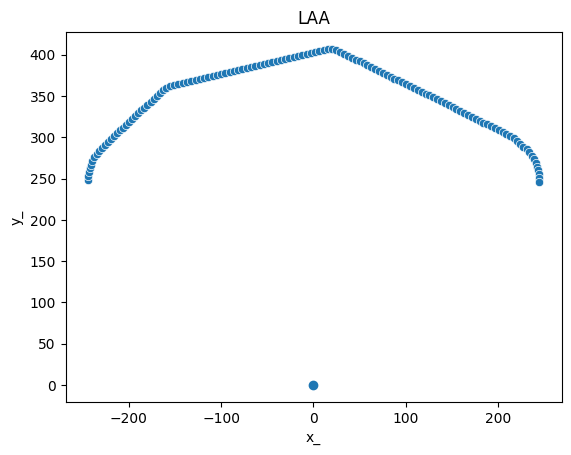

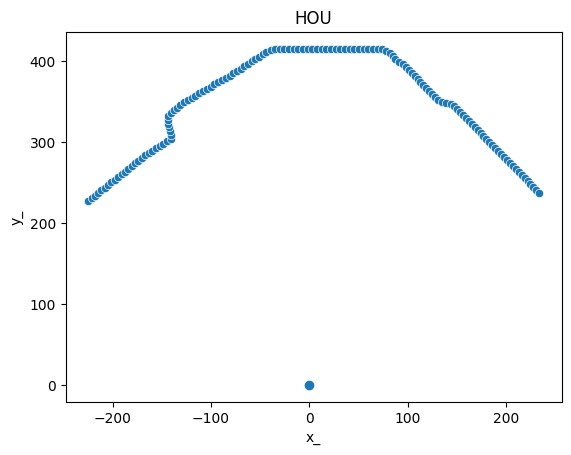

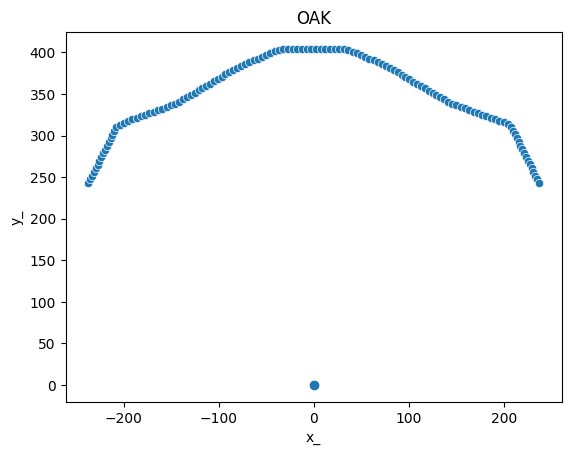

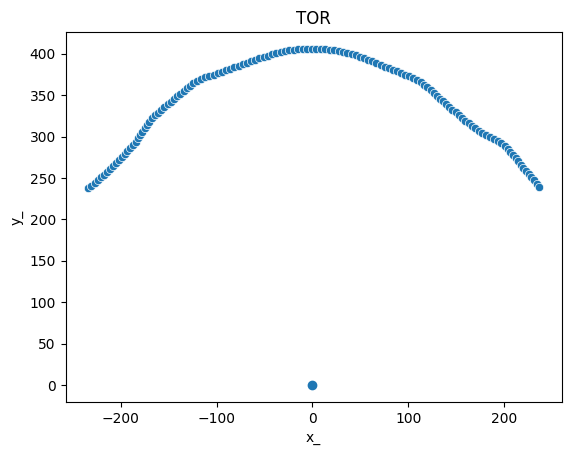

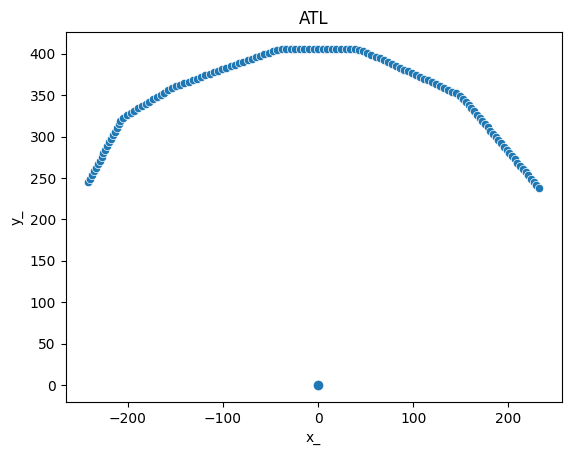

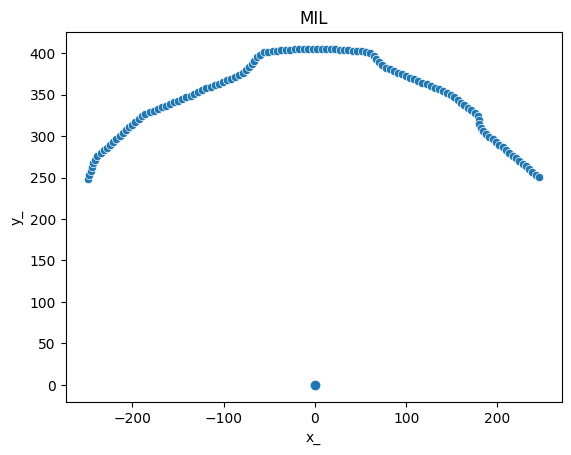

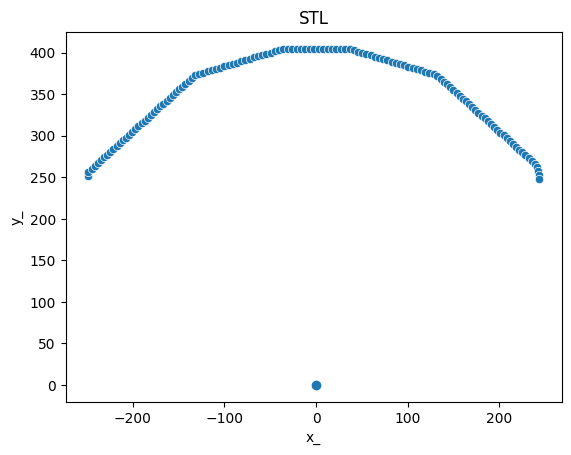

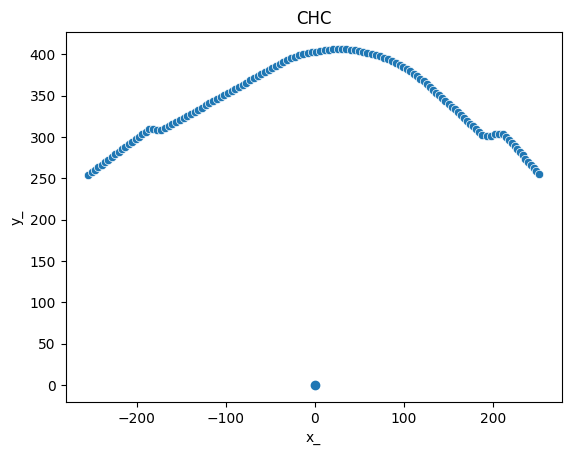

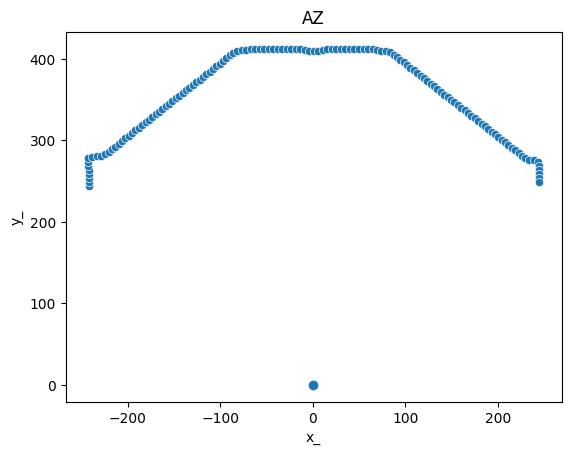

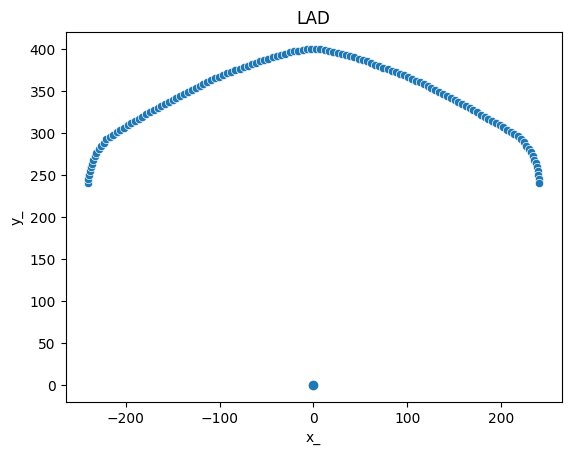

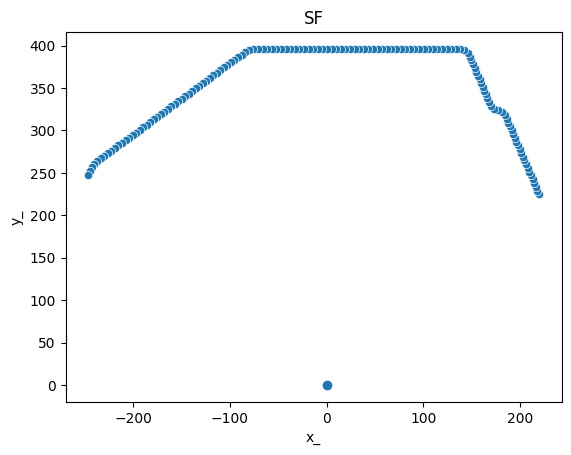

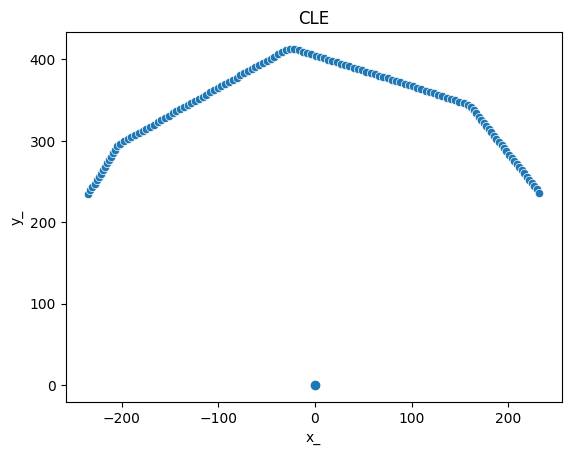

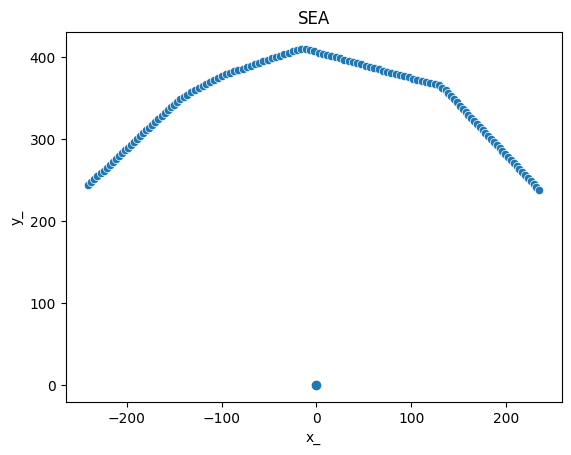

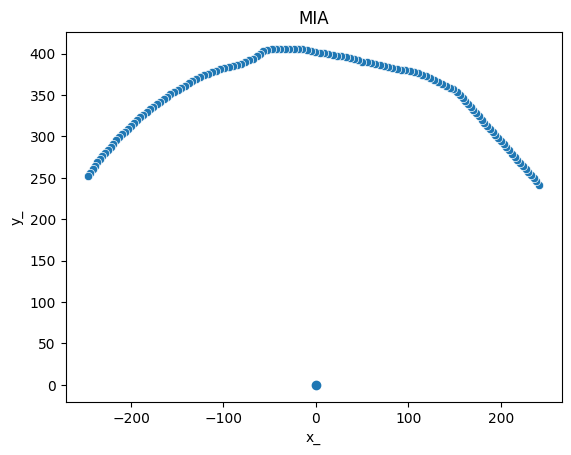

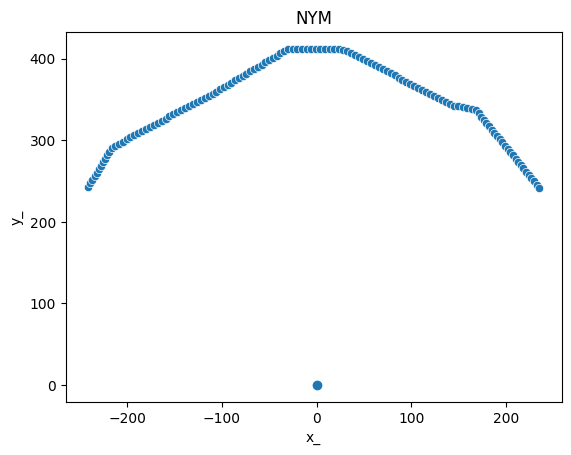

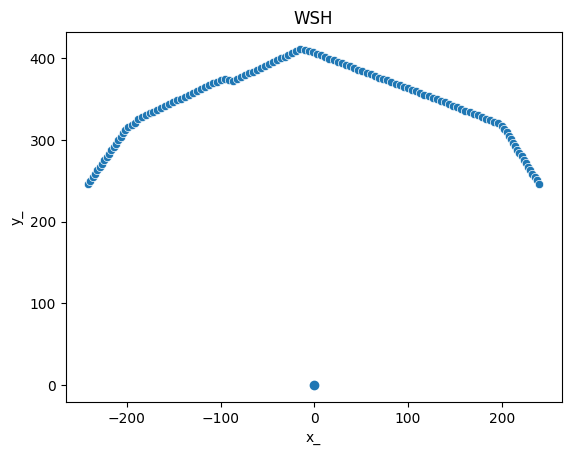

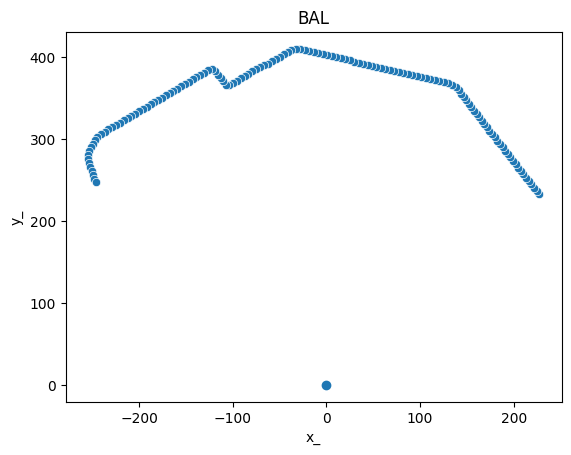

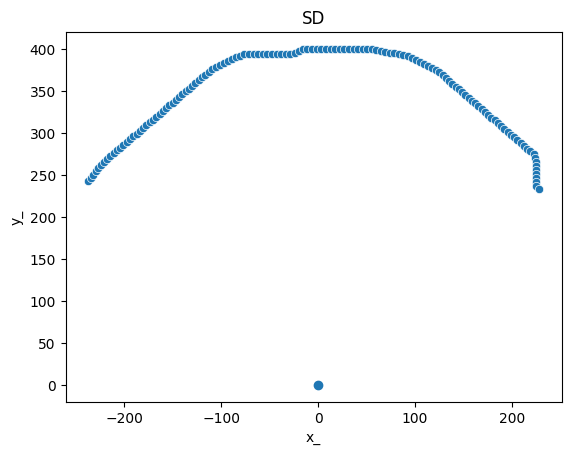

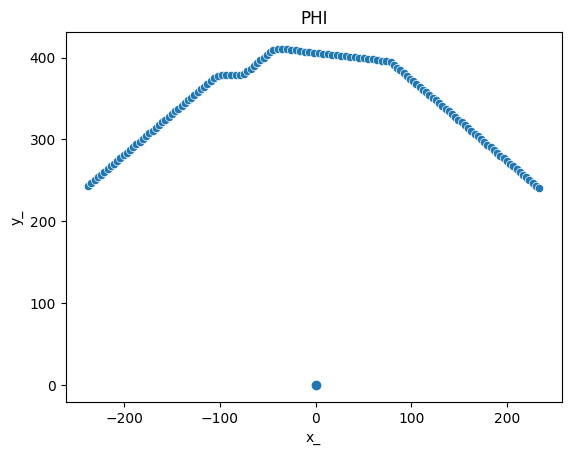

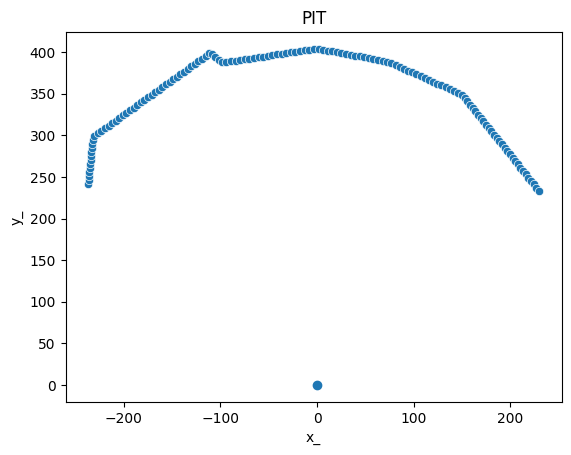

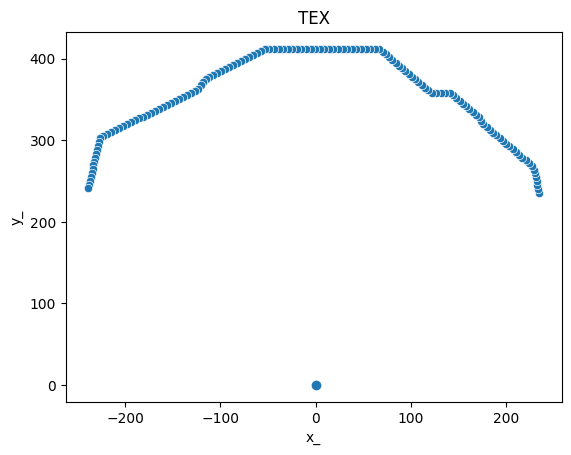

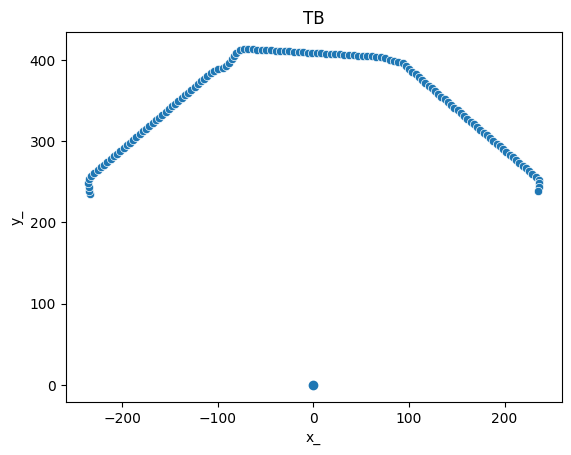

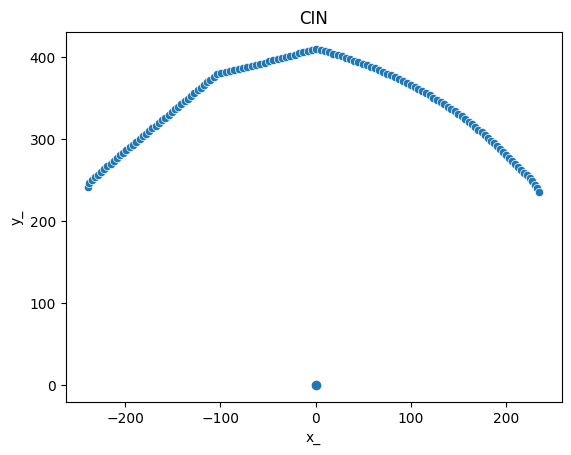

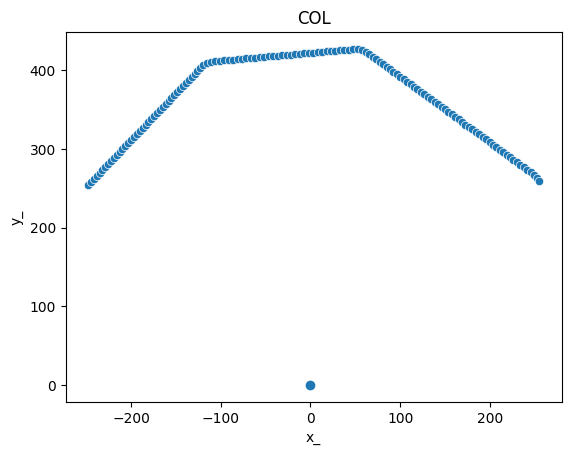

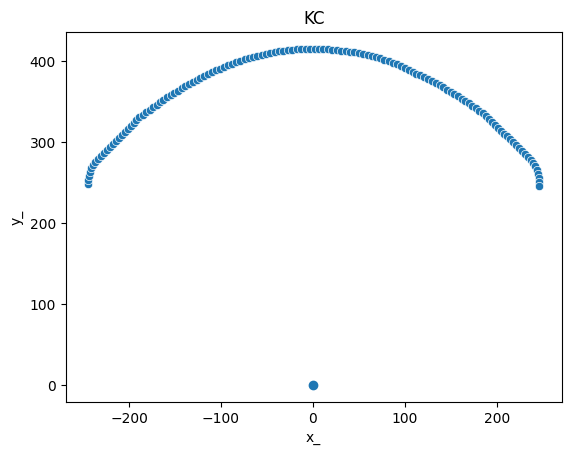

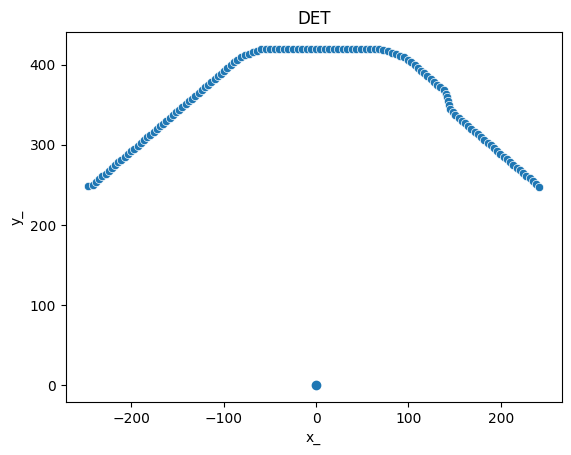

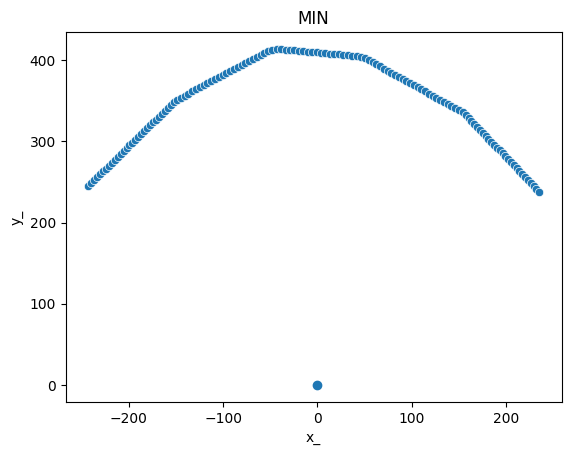

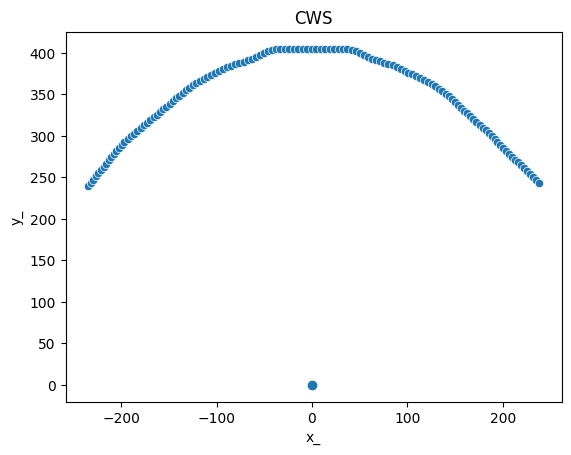

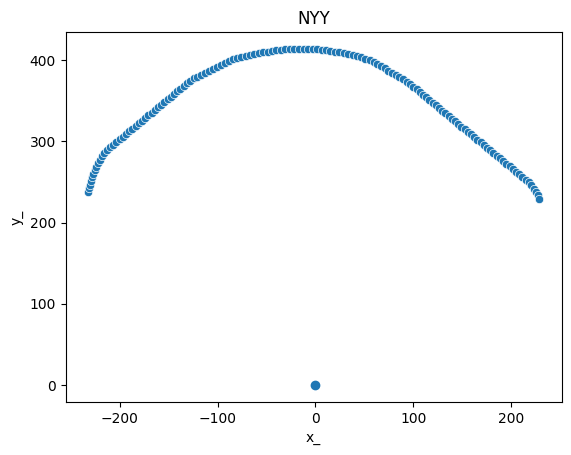

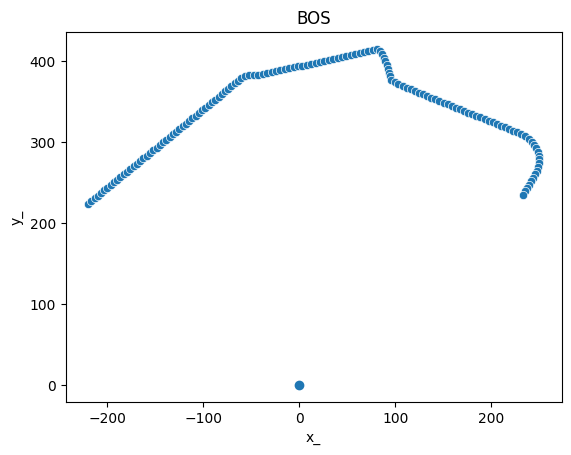

In [86]:
for team in team_maps['team'].unique():
    sns.scatterplot(team_maps.query(f'team == "{team}"'),x='x_',y='y_')
    plt.plot(0,0,marker='o')
    plt.title(team)
    plt.show()

In [61]:
team_maps.query('team == "TEX" and spray_angle > -3').head(40)

,x,y,team,x_,y_,dist,spray_angle,height
65,117.758895,31.328721,TEX,-18.071415,418.452349,418.842386,-2.472857,8.0
66,119.756714,31.319813,TEX,-13.085518,418.474581,418.679120,-1.791030,8.0
67,121.754532,31.310904,TEX,-8.099620,418.496813,418.575186,-1.108769,8.0
68,123.752350,31.301996,TEX,-3.113723,418.519045,418.530628,-0.426265,8.0
69,125.750169,31.293088,TEX,1.872174,418.541277,418.545464,0.256288,8.0
70,127.747987,31.284180,TEX,6.858071,418.563509,418.619689,0.938695,8.0
71,129.745805,31.275271,TEX,11.843968,418.585741,418.753271,1.620763,8.0
72,131.743623,31.266363,TEX,16.829865,418.607973,418.946154,2.302300,8.0
73,133.741442,31.257455,TEX,21.815763,418.630205,419.198254,2.983114,8.0
74,135.739260,31.248547,TEX,26.801660,418.652437,419.509466,3.663013,8.0


In [89]:
from svg.path import parse_path
from svg.path.path import Line, Arc, CubicBezier, QuadraticBezier

def transform_point(x, y, scale=2.495671):
    return scale * (x - 125), scale * (199 - y)

def transform_path(path_string):
    parsed_path = parse_path(path_string)
    transformed_commands = []
    
    for segment in parsed_path:
        if isinstance(segment, Line):
            start = transform_point(segment.start.real, segment.start.imag)
            end = transform_point(segment.end.real, segment.end.imag)
            transformed_commands.append(f"M{start[0]} {start[1]} L{end[0]} {end[1]}")
        
        elif isinstance(segment, CubicBezier):
            start = transform_point(segment.start.real, segment.start.imag)
            end = transform_point(segment.end.real, segment.end.imag)
            control1 = transform_point(segment.control1.real, segment.control1.imag)
            control2 = transform_point(segment.control2.real, segment.control2.imag)
            transformed_commands.append(f"M{start[0]} {start[1]} C{control1[0]} {control1[1]} {control2[0]} {control2[1]} {end[0]} {end[1]}")
            
        # Handle other segment types (Arc, QuadraticBezier, etc.) similarly...

    return " ".join(transformed_commands)

svg_path = 'M125.8 216.5c-9.2 0-15.7-7.8-15.8-7.9l-32.4-37.1L59 129.8l-18.1-16.9-1.4-4.4V107l.3-2.5.4-2.8.5-2.3 1.6-4.7.9-2.1 3-3.9.9-1.1S73.2 60 77.9 55.9c12.6-11.3 34.8-12.8 34.8-12.8H123.3l8.2 1.3 2.3.4 7.8 2.6 1.6.6L157 58l47 45.1 1.1 1.1s2.7 3.1 0 6.5-11.9 14.7-11.9 14.7l-23.1 43.3-32.5 42c-1.7 2-6 5.8-11.8 5.8z'
new_path = transform_path(svg_path)
print(new_path)


M1.996536799999993 -43.674242500000005 C-20.963636400000016 -43.674242500000005 -37.185497900000016 -24.208008699999972 -37.435065 -23.958441599999986 M-37.435065 -23.958441599999986 L-118.29480540000003 68.6309525 M-118.29480540000003 68.6309525 L-164.71428600000002 172.7004332 M-164.71428600000002 172.7004332 L-209.8859311 214.8772731 M-209.8859311 214.8772731 L-213.3798705 225.85822550000003 M-213.3798705 225.85822550000003 L-213.3798705 229.60173200000003 M-213.3798705 229.60173200000003 L-212.63116920000002 235.8409095 M-212.63116920000002 235.8409095 L-211.63290080000004 242.8287883 M-211.63290080000004 242.8287883 L-210.38506530000004 248.5688316 M-210.38506530000004 248.5688316 L-206.39199170000003 260.29848530000004 M-206.39199170000003 260.29848530000004 L-204.14588780000005 265.5393944 M-204.14588780000005 265.5393944 L-196.65887480000004 275.2725113 M-196.65887480000004 275.2725113 L-194.41277090000003 278.0177494 M-194.41277090000003 278.0177494 C-194.41277090000003 278.01